In [4]:
#Import Code 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
def Shap_Plot(csv, name):

    #transform Data
    del csv[csv.columns[0]]
    csv_t = csv.transpose()
    x = csv_t.reset_index()
    xn = x.rename({x.columns[0]: 'Player', x.columns[1]: 'Shap_Value'}, axis='columns')
    xn['Shap_Value'] = xn['Shap_Value'].astype(float)
    xns = xn.sort_values(by=['Shap_Value'], ascending=True)
    xnsr = xns.reset_index(drop='True')
    

    #Data for the Bar Chart 
    categories = xnsr['Player'].values
    values = xnsr['Shap_Value'].values * 100
    c = [ 'gold' if x > 5 else "indigo" for x in range(len(categories))]
    # Create the bar chart
    plt.barh(categories, values,color=c)

    # Set labels and title
    plt.xlabel('Shap Value x 100')
    plt.title('{} LA Lakers General Shap Values'.format(name)) 

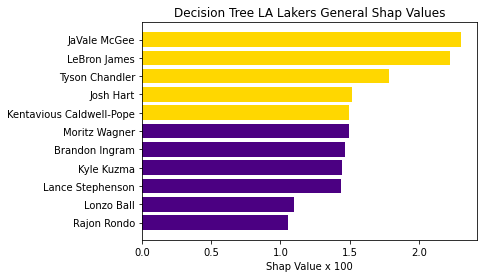

In [7]:
csv_dt = pd.read_csv("dec_tree_shap_lakers_18_19.csv")
Shap_Plot(csv_dt,"Decision Tree")
plt.savefig('SV_DT.png',bbox_inches='tight',format='png',dpi="figure",transparent=True)
plt.show()

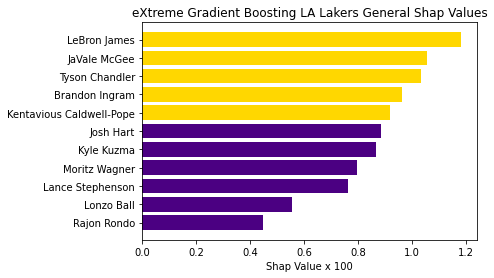

In [8]:
csv_xgb = pd.read_csv("xgbcl_shap_lakers_18_19.csv")
Shap_Plot(csv_xgb,"eXtreme Gradient Boosting")
plt.savefig('SV_Xgb.png',bbox_inches='tight',format='png',dpi="figure",transparent=True)
plt.show()

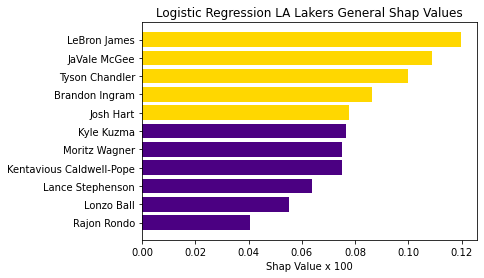

In [10]:
csv_log = pd.read_csv("log_reg_shap_lakers_18_19.csv")
csv_log
Shap_Plot(csv_log,"Logistic Regression")
plt.savefig('SV_log.png',bbox_inches='tight',format='png',dpi="figure",transparent=True)

plt.show()

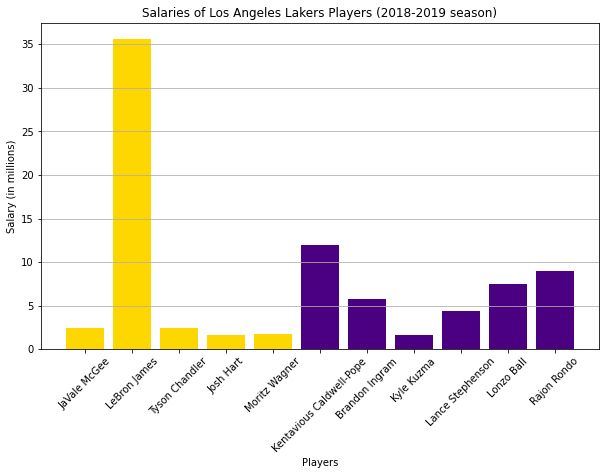

In [11]:
players = ["JaVale McGee", "LeBron James", "Tyson Chandler", "Josh Hart", "Moritz Wagner", "Kentavious Caldwell-Pope", "Brandon Ingram", "Kyle Kuzma", "Lance Stephenson", "Lonzo Ball", "Rajon Rondo"]
salaries = [2.39, 35.65, 2.39, 1.66, 1.76, 12.0, 5.76, 1.69, 4.45, 7.46, 9.0]

# Set color for the first 5 players to gold and the rest to indigo
colors = ['gold' if idx < 5 else 'indigo' for idx in range(len(players))]

plt.figure(figsize=(10, 6))
plt.bar(players, salaries, color=colors)
plt.xlabel('Players')
plt.ylabel('Salary (in millions)')
plt.title('Salaries of Los Angeles Lakers Players (2018-2019 season)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('Salaries.png',bbox_inches='tight',format='png',dpi="figure",transparent=True)

